In [1]:
import pandas as pd
from google.colab import files
import io

print("Please upload the NEWLY SAVED 'Airbnb_Cleaned_Data.xlsx' file.")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

try:
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))
    print("\nFile successfully loaded! You are ready for analysis.")
except Exception as e:
    print(f"\nFATAL ERROR: Failed to load cleaned file: {e}")


Please upload the NEWLY SAVED 'Airbnb_Cleaned_Data.xlsx' file.


Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx

File successfully loaded! You are ready for analysis.


In [2]:
print("--- DataFrame Info (Check for 20+ columns) ---")
df.info()

# --- 1. Data Cleaning (Convert Price/Fee to Numbers) ---
# Remove '$' and ',' then convert to a numeric type (float)
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

# --- 2. Handle missing data ---
# Fill missing prices/fees with the median (a safe measure)
df['price'].fillna(df['price'].median(), inplace=True)
df['service fee'].fillna(df['service fee'].median(), inplace=True)

# Drop rows where critical categorical data is missing
df.dropna(subset=['neighbourhood group', 'room type'], inplace=True)

# --- 3. Final Check ---
print("\n--- First 5 Rows After Cleaning ---")
df.head()

--- DataFrame Info (Check for 20+ columns) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country c

/tmp/ipython-input-2869196361.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)
/tmp/ipython-input-2869196361.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN



--- Average Price by Neighbourhood Group ---
neighbourhood group
Queens           630.192206
Bronx            627.756637
Brooklyn         626.556498
Staten Island    624.489005
Manhattan        622.444145
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


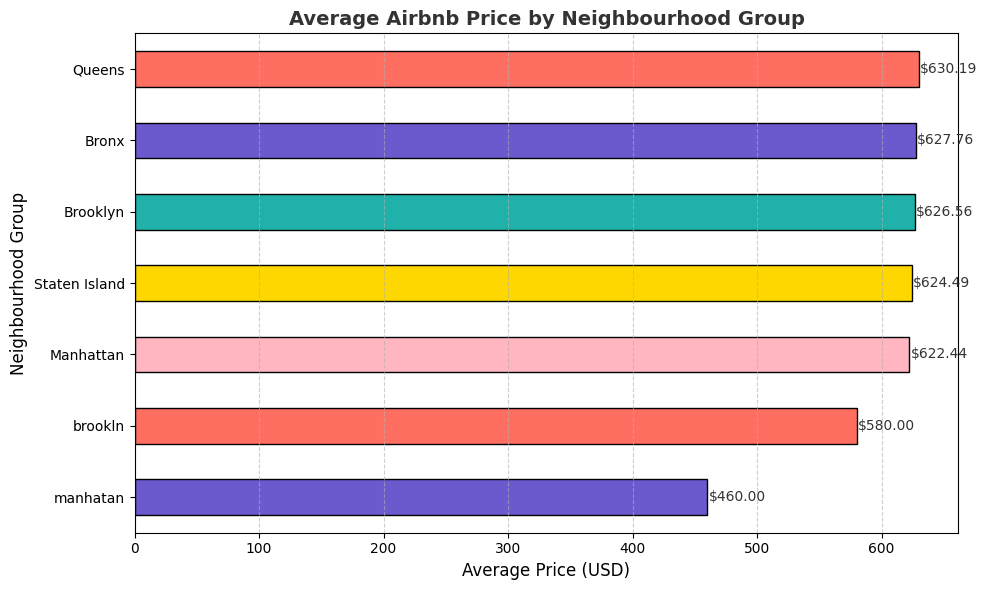

In [4]:
import matplotlib.pyplot as plt

# Calculate and display the average price for each neighbourhood group
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print("\n--- Average Price by Neighbourhood Group ---")
print(avg_price)

# 🎨 Plot: Horizontal Bar Chart for Better Readability
plt.figure(figsize=(10, 6))
avg_price.plot(
    kind='barh',
    color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFD700', '#FFB6C1'],  # custom palette
    edgecolor='black'
)

# Add chart details
plt.title('Average Airbnb Price by Neighbourhood Group', fontsize=14, weight='bold', color='#333')
plt.xlabel('Average Price (USD)', fontsize=12)
plt.ylabel('Neighbourhood Group', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Highest price group at top

# Add data labels to each bar
for index, value in enumerate(avg_price):
    plt.text(value + 1, index, f"${value:.2f}", va='center', fontsize=10, color='#333')

plt.tight_layout()
plt.savefig('avg_price_by_group.png', dpi=300, bbox_inches='tight')
plt.show()



--- Answer to Question 1: Different Property (Room) Types ---
room type
Entire home/apt    53690
Private room       46538
Shared room         2226
Hotel room           116
Name: count, dtype: int64


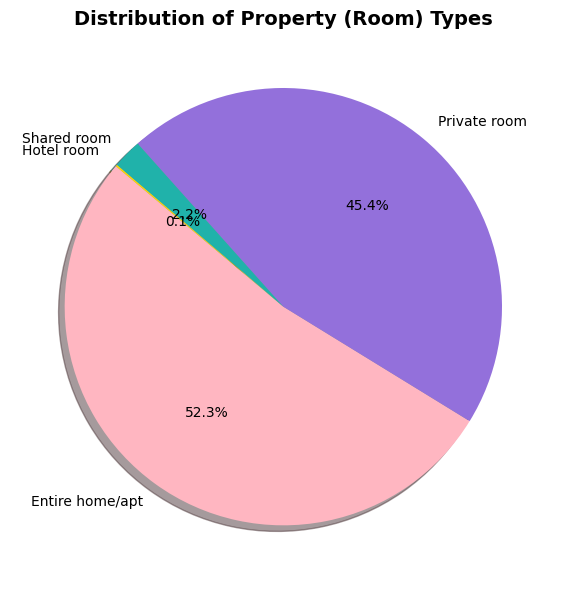

In [5]:
print("\n--- Answer to Question 1: Different Property (Room) Types ---")
property_types = df['room type'].value_counts()
print(property_types)

# 🎨 Visualize the property types using a Pie Chart
plt.figure(figsize=(8, 6))
property_types.plot(
    kind='pie',
    autopct='%1.1f%%',        # show percentages
    startangle=140,           # start angle for better appearance
    colors=['#FFB6C1', '#9370DB', '#20B2AA', '#FFD700'],  # custom color palette
    shadow=True
)

plt.title('Distribution of Property (Room) Types', fontsize=14, weight='bold')
plt.ylabel('')  # hide the y-label (unnecessary for pie)
plt.tight_layout()
plt.show()




--- Answer to Question 2: Neighbourhood Group with Most Listings ---
neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


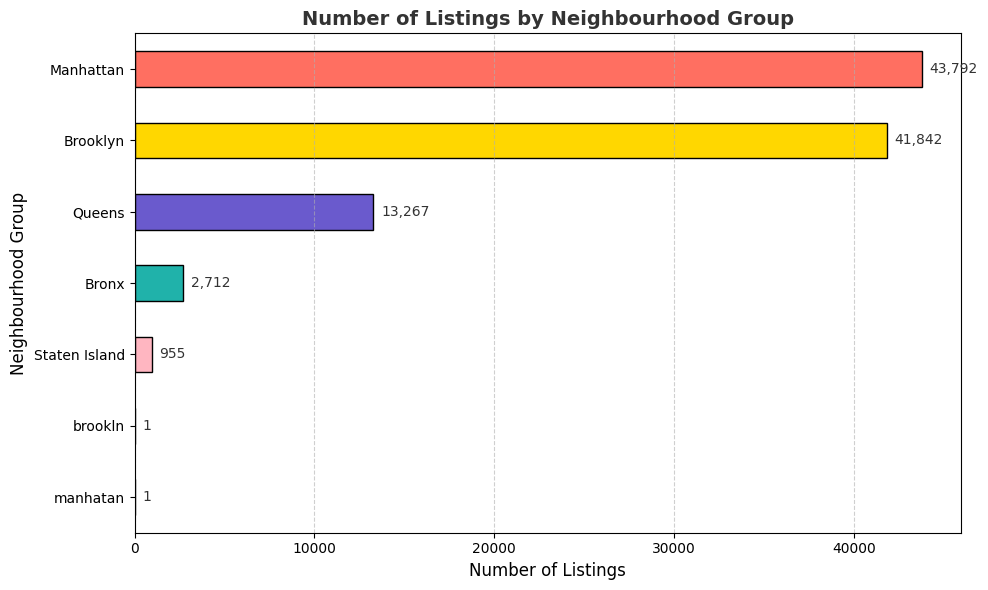

In [6]:
print("\n--- Answer to Question 2: Neighbourhood Group with Most Listings ---")
listings_by_neighbourhood_group = df['neighbourhood group'].value_counts().sort_values(ascending=False)
print(listings_by_neighbourhood_group)

# 🎨 Visualize the number of listings by neighbourhood group (Enhanced)
plt.figure(figsize=(10, 6))
listings_by_neighbourhood_group.plot(
    kind='barh',
    color=['#FF6F61', '#FFD700', '#6A5ACD', '#20B2AA', '#FFB6C1'],  # vibrant gradient colors
    edgecolor='black'
)

# Add chart details
plt.title('Number of Listings by Neighbourhood Group', fontsize=14, weight='bold', color='#333')
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Neighbourhood Group', fontsize=12)
plt.gca().invert_yaxis()  # Highest listing group at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add data labels to each bar
for index, value in enumerate(listings_by_neighbourhood_group):
    plt.text(value + max(listings_by_neighbourhood_group)*0.01, index, f"{value:,}", va='center', fontsize=10, color='#333')

plt.tight_layout()
plt.show()




--- Answer to Question 3: ACCURATE Average Price by Neighbourhood Group ---
neighbourhood group
Queens           630.192206
Bronx            627.756637
Brooklyn         626.556498
Staten Island    624.489005
Manhattan        622.444145
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


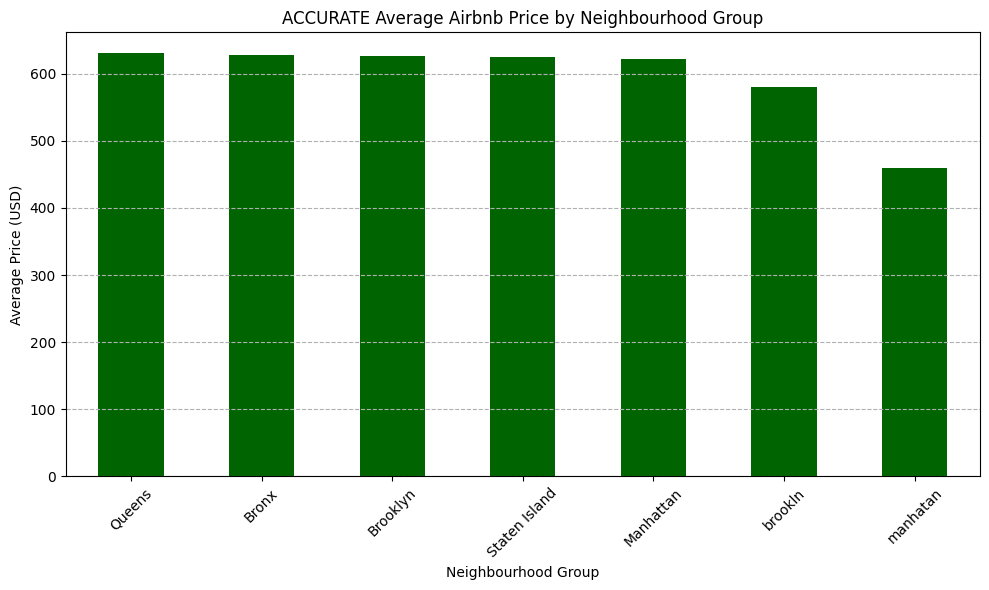

In [7]:
import matplotlib.pyplot as plt

# Re-calculate the average price after standardization
avg_price_cleaned = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print("\n--- Answer to Question 3: ACCURATE Average Price by Neighbourhood Group ---")
print(avg_price_cleaned)

# Re-plot the results
plt.figure(figsize=(10, 6))
avg_price_cleaned.plot(kind='bar', color='darkgreen')
plt.title('ACCURATE Average Airbnb Price by Neighbourhood Group')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


--- Answer to Question 4: Host with the Highest Number of Listings ---
host id
72493468101    2
83720815583    2
98402835539    2
31263630543    2
7095669452     2
Name: id, dtype: int64


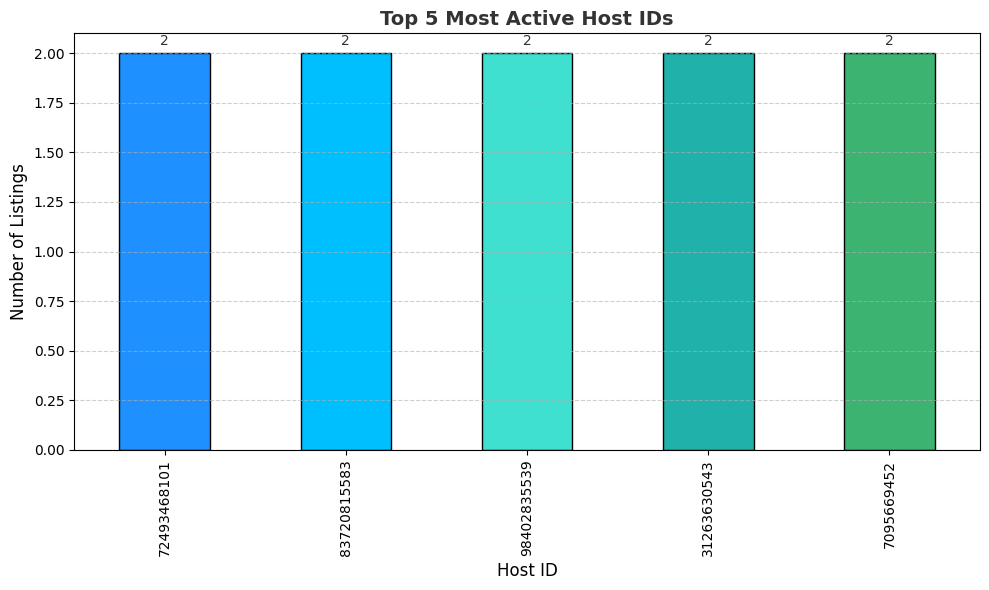

In [8]:
print("\n--- Answer to Question 4: Host with the Highest Number of Listings ---")

# Count the number of listings per host and get the top 5
top_hosts = df.groupby('host id')['id'].count().sort_values(ascending=False).head(5)
print(top_hosts)

# 🎨 Visualize the Top 5 Hosts (Enhanced)
plt.figure(figsize=(10, 6))
top_hosts.plot(
    kind='bar',
    color=['#1E90FF', '#00BFFF', '#40E0D0', '#20B2AA', '#3CB371'],  # gradient blue-green shades
    edgecolor='black'
)

# Add chart details
plt.title('Top 5 Most Active Host IDs', fontsize=14, weight='bold', color='#333')
plt.xlabel('Host ID', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add data labels on top of each bar
for index, value in enumerate(top_hosts):
    plt.text(index, value + (max(top_hosts) * 0.02), f"{value}", ha='center', fontsize=10, color='#333')

plt.tight_layout()
plt.show()



--- Answer to Question 5: Price Distribution (Enhanced Visualization) ---


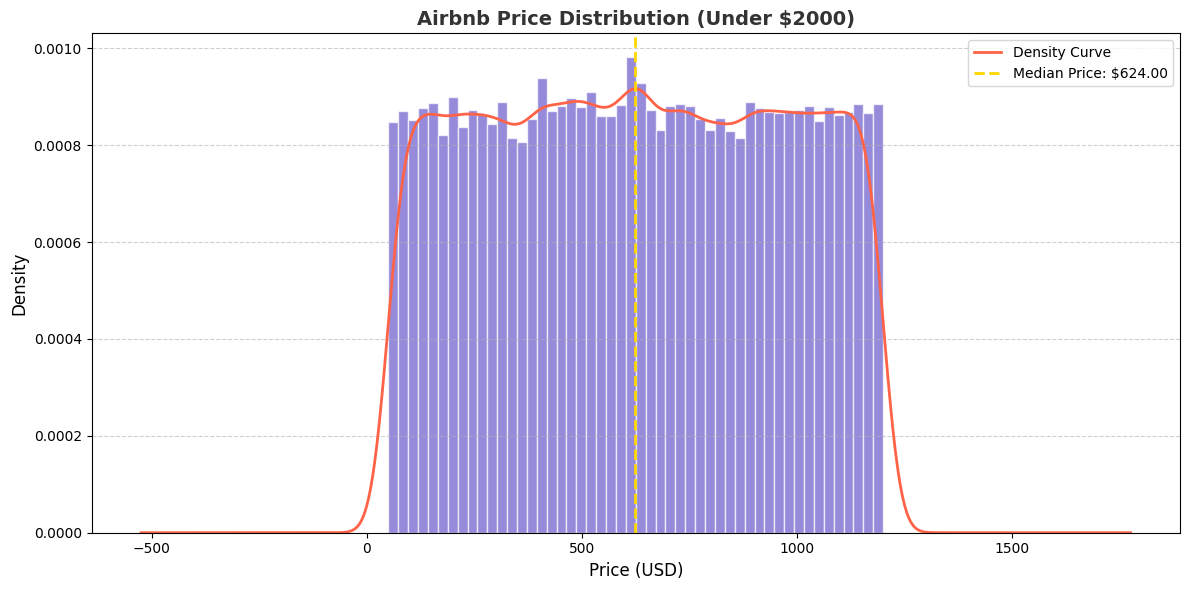

In [9]:
import matplotlib.pyplot as plt

print("\n--- Answer to Question 5: Price Distribution (Enhanced Visualization) ---")

# 🎯 Filter prices below $2000 to remove outliers
filtered_prices = df[df['price'] < 2000]['price']

# 🎨 Plot an enhanced price distribution
plt.figure(figsize=(12, 6))

# Histogram with smooth density overlay
plt.hist(
    filtered_prices,
    bins=50,
    color='#6A5ACD',         # soft purple tone
    edgecolor='white',
    alpha=0.7,
    density=True
)

# Overlay KDE curve for smooth trend
filtered_prices.plot(kind='kde', color='#FF6347', linewidth=2, label='Density Curve')

# Add median line
plt.axvline(df['price'].median(), color='#FFD700', linestyle='--', linewidth=2, label=f"Median Price: ${df['price'].median():.2f}")

# Chart styling
plt.title('Airbnb Price Distribution (Under $2000)', fontsize=14, weight='bold', color='#333')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()






--- Answer to Question 6: Average Minimum Nights by Room Type ---
room type
Entire home/apt    9.808533
Shared room        6.600540
Private room       6.288466
Hotel room         4.131579
Name: minimum nights, dtype: float64


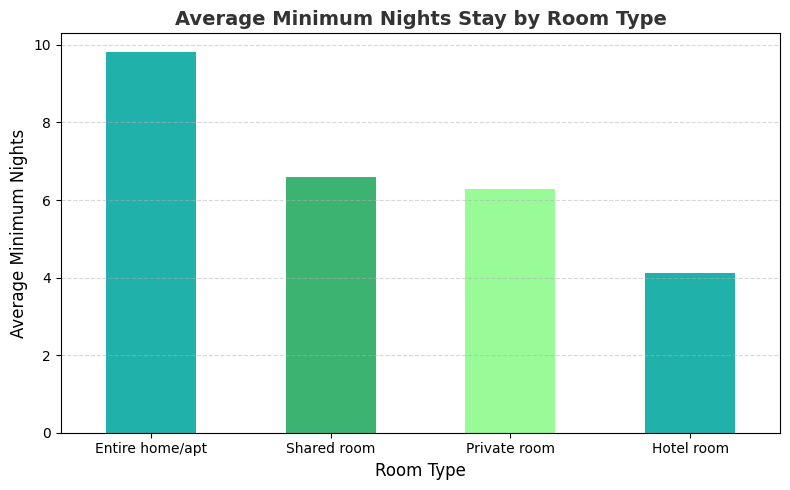

In [10]:
print("\n--- Answer to Question 6: Average Minimum Nights by Room Type ---")

# Calculate the mean 'minimum nights' for each 'room type'
avg_min_nights = df.groupby('room type')['minimum nights'].mean().sort_values(ascending=False)
print(avg_min_nights)

# 🎨 Visualize the average minimum nights with new colors
plt.figure(figsize=(8, 5))
avg_min_nights.plot(kind='bar', color=['#20B2AA', '#3CB371', '#98FB98'])  # teal → medium sea green → pale green
plt.title('Average Minimum Nights Stay by Room Type', fontsize=14, weight='bold', color='#333')
plt.ylabel('Average Minimum Nights', fontsize=12)
plt.xlabel('Room Type', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



--- Answer to Question 7: Average Price by Review Rate ---
review rate number
1.0    626.671554
2.0    626.629731
3.0    626.078719
4.0    626.779274
5.0    621.504323
Name: price, dtype: float64


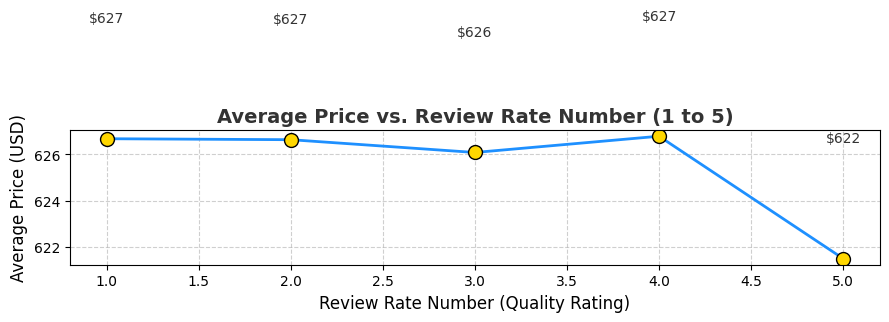

In [11]:
# Code to answer Question 7: Price vs. Review Rate

# Filter out null values for clean comparison
df_reviews = df.dropna(subset=['review rate number', 'price'])

# Calculate the average price for each review rate number
avg_price_by_review = df_reviews.groupby('review rate number')['price'].mean().sort_index()

print("\n--- Answer to Question 7: Average Price by Review Rate ---")
print(avg_price_by_review)

# 🎨 Visualize using a line chart with markers
plt.figure(figsize=(9, 6))
plt.plot(
    avg_price_by_review.index,
    avg_price_by_review.values,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='#1E90FF',           # Dodger blue line
    markerfacecolor='#FFD700', # Gold markers
    markeredgecolor='black',
    markersize=10
)

# Add chart details
plt.title('Average Price vs. Review Rate Number (1 to 5)', fontsize=14, weight='bold', color='#333')
plt.xlabel('Review Rate Number (Quality Rating)', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)

# Annotate each point with its value
for x, y in zip(avg_price_by_review.index, avg_price_by_review.values):
    plt.text(x, y + 5, f"${y:.0f}", ha='center', fontsize=10, color='#333')

plt.tight_layout()
plt.show()



--- Answer to Question 8: Average Availability by Cancellation Policy ---
cancellation_policy
strict      141.667697
flexible    141.075640
moderate    140.537310
Name: availability 365, dtype: float64


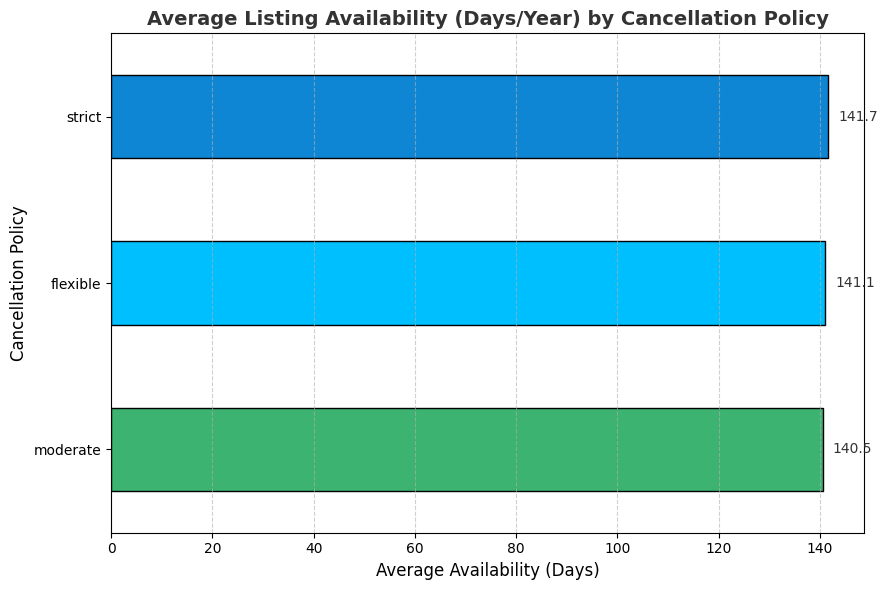

In [12]:
# Code to answer Question 8: Average Availability by Cancellation Policy

# Calculate the average 'availability 365' for each cancellation policy
avg_availability = df.groupby('cancellation_policy')['availability 365'].mean().sort_values(ascending=False)

print("\n--- Answer to Question 8: Average Availability by Cancellation Policy ---")
print(avg_availability)

# 🎨 Visualize using a horizontal bar chart with gradient colors
plt.figure(figsize=(9, 6))
avg_availability.plot(
    kind='barh',
    color=['#0E86D4', '#00BFFF', '#3CB371', '#98FB98'],  # blue–green gradient
    edgecolor='black'
)

# Add chart details
plt.title('Average Listing Availability (Days/Year) by Cancellation Policy', fontsize=14, weight='bold', color='#333')
plt.xlabel('Average Availability (Days)', fontsize=12)
plt.ylabel('Cancellation Policy', fontsize=12)
plt.gca().invert_yaxis()  # Highest value at top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels next to each bar
for index, value in enumerate(avg_availability):
    plt.text(value + 2, index, f"{value:.1f}", va='center', fontsize=10, color='#333')

plt.tight_layout()
plt.show()



--- Answer to Question 9: Average Price by Construction Decade ---
Decade
2000s    627.436351
2010s    623.477775
2020s    626.522868
Name: price, dtype: float64


/tmp/ipython-input-3135504693.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


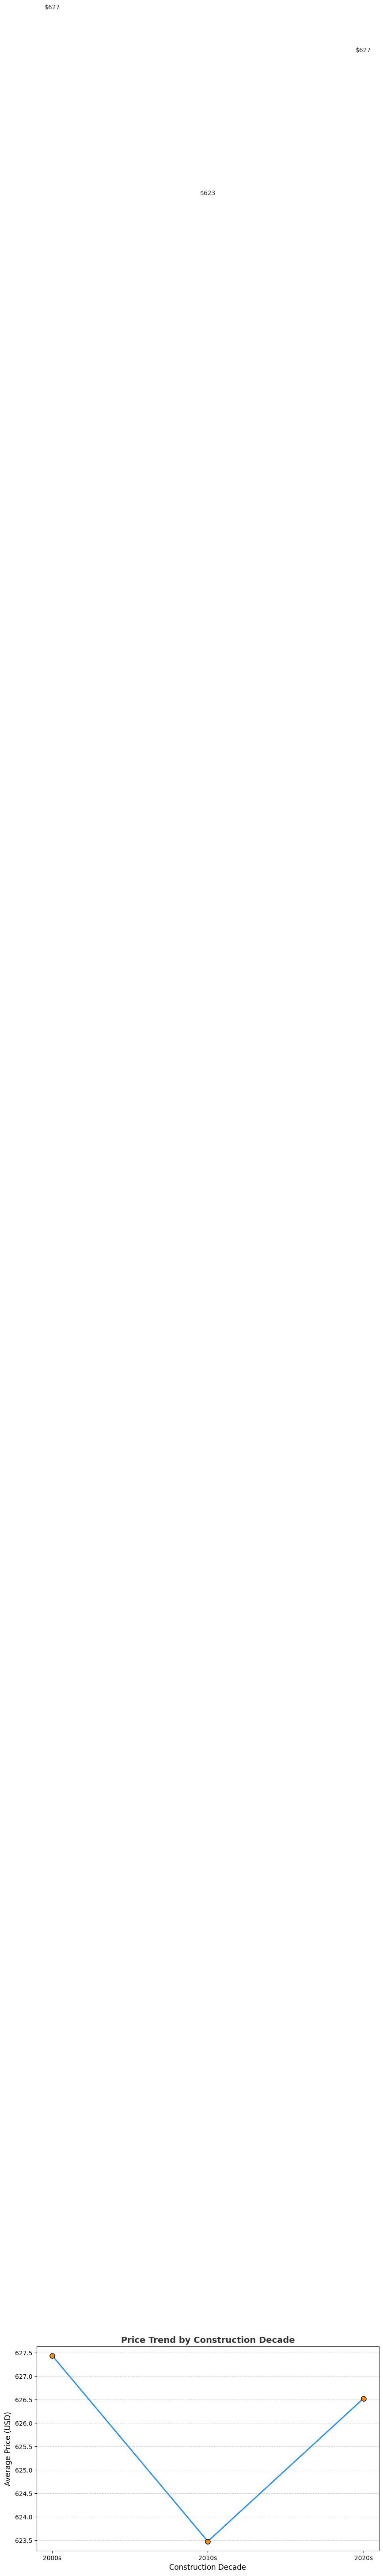

In [13]:
# 1. Convert 'Construction year' to integers and drop nulls
df_year = df.dropna(subset=['Construction year', 'price']).copy()
df_year['Construction year'] = df_year['Construction year'].astype(int)

# 2. Group years into decades (e.g., 2007 -> 2000s) for trend clarity
df_year['Decade'] = (df_year['Construction year'] // 10) * 10
df_year['Decade'] = df_year['Decade'].astype(str) + 's'

# 3. Calculate average price by decade
avg_price_by_decade = df_year.groupby('Decade')['price'].mean().sort_index()

print("\n--- Answer to Question 9: Average Price by Construction Decade ---")
print(avg_price_by_decade)

# 🎨 Visualize the price trend with new colors
plt.figure(figsize=(10, 6))
plt.plot(
    avg_price_by_decade.index,
    avg_price_by_decade.values,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='#1E90FF',           # Dodger blue line
    markerfacecolor='#FF8C00', # Dark orange markers
    markeredgecolor='black',
    markersize=8
)

# Chart styling
plt.title('Price Trend by Construction Decade', fontsize=14, weight='bold', color='#333')
plt.xlabel('Construction Decade', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate each point with value
for x, y in zip(avg_price_by_decade.index, avg_price_by_decade.values):
    plt.text(x, y + 50, f"${y:.0f}", ha='center', fontsize=10, color='#333')

plt.tight_layout()
plt.show()



--- Answer to Question 10: Average Price by Host Identity Verification ---
host_identity_verified
unconfirmed    626.640828
verified       623.853207
Name: price, dtype: float64


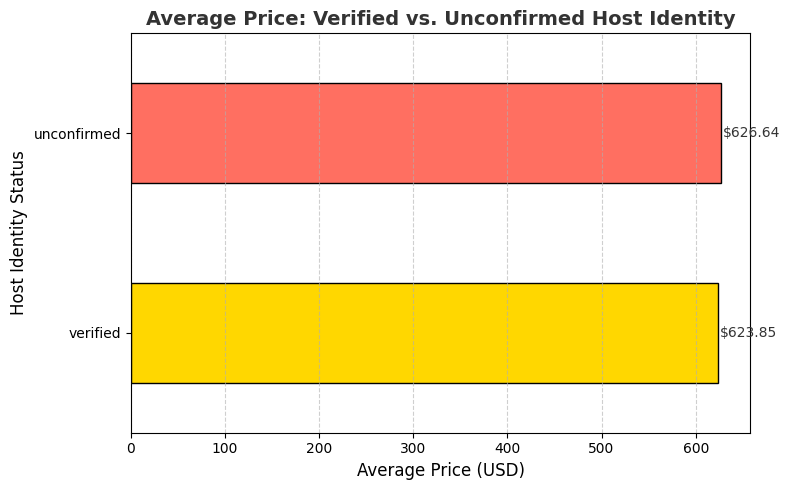

In [14]:
# Code to answer Question 10: Price difference by host verification status

# Calculate the average price for each host identity verification status
avg_price_by_verification = df.groupby('host_identity_verified')['price'].mean().sort_values(ascending=False)

print("\n--- Answer to Question 10: Average Price by Host Identity Verification ---")
print(avg_price_by_verification)

# 🎨 Visualize using a horizontal bar chart with updated colors
plt.figure(figsize=(8, 5))
avg_price_by_verification.plot(
    kind='barh',
    color=['#FF6F61', '#FFD700', '#6A5ACD'],  # modern coral, gold, purple
    edgecolor='black'
)

# Chart styling
plt.title('Average Price: Verified vs. Unconfirmed Host Identity', fontsize=14, weight='bold', color='#333')
plt.xlabel('Average Price (USD)', fontsize=12)
plt.ylabel('Host Identity Status', fontsize=12)
plt.gca().invert_yaxis()  # highest price on top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels
for index, value in enumerate(avg_price_by_verification):
    plt.text(value + 2, index, f"${value:.2f}", va='center', fontsize=10, color='#333')

plt.tight_layout()
plt.show()



--- Answer to Question 11: Correlation (Reviews Per Month vs. Price) ---
Pearson Correlation Coefficient: 0.0042


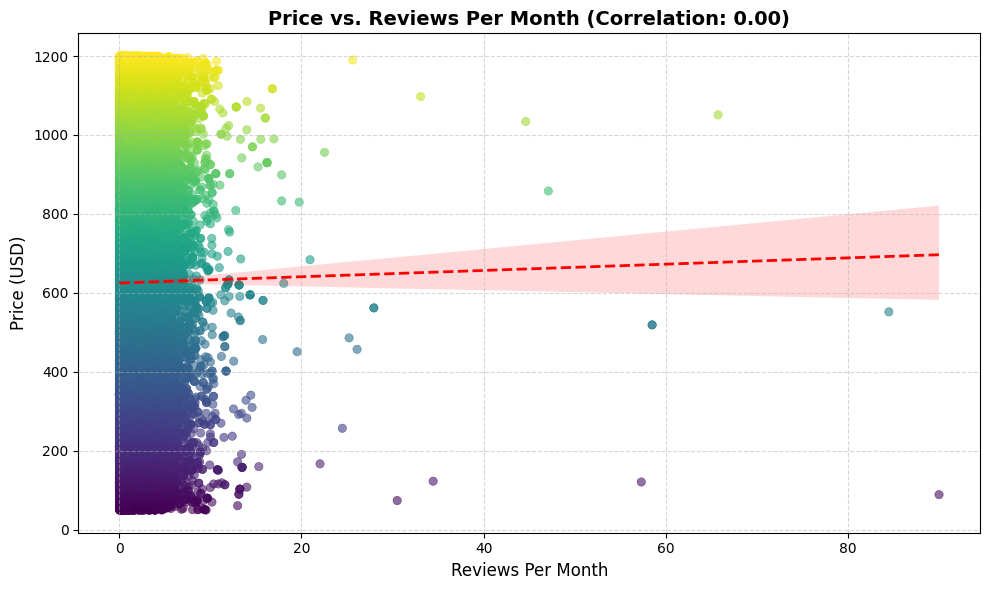

In [15]:
import numpy as np
import seaborn as sns

# Filter data to exclude extreme price outliers for a readable chart
df_filtered = df[df['price'] < 1500].dropna(subset=['reviews per month'])

# Calculate the correlation coefficient
correlation = df_filtered['reviews per month'].corr(df_filtered['price'])
print(f"\n--- Answer to Question 11: Correlation (Reviews Per Month vs. Price) ---")
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# 🎨 Enhanced scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='reviews per month',
    y='price',
    data=df_filtered,
    hue='price',            # color points based on price
    palette='viridis',      # gradient color map
    alpha=0.6,
    edgecolor=None,
    legend=False
)

# Add trend line
sns.regplot(
    x='reviews per month',
    y='price',
    data=df_filtered,
    scatter=False,
    color='red',
    line_kws={'linewidth':2, 'linestyle':'--'}
)

# Chart styling
plt.title(f'Price vs. Reviews Per Month (Correlation: {correlation:.2f})', fontsize=14, weight='bold')
plt.xlabel('Reviews Per Month', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
